# Assignment 4 - MDP 1 (Forest Management)

By Dongbo Zhang 

@dzhang48@gatech.edu


In [ ]:
!pip install gym --user

In [ ]:
!pip install pymdptoolbox --user

In [ ]:
!pip install mdptoolbox-hiive --user

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import hiive.mdptoolbox.mdp as mdp
import numpy as np
plt.style.use('ggplot')
import hiive.mdptoolbox.example as example
import seaborn as sns
plt.style.use('ggplot')
import gym

# Small Size Problem

In [98]:
N_STATES = 10
P, R = example.forest(S=N_STATES, r1=5, r2=2, p=0.3)

## Policy Iteration

In [99]:
def run_pi(P, R, discount, max_iter, n_state):
    pi = mdp.PolicyIteration(P, R, discount, max_iter=max_iter)
    pi_res = pi.run()
    #print (pi_res)
    iterations, reward, max_reward, mean_reward, error, runtime = [], [], [], [], [], []
    for dict_ in pi_res:
        iterations.append(dict_['Iteration'])
        
        reward.append(dict_['Reward'])
        
        
        mean_reward.append(dict_['Mean V'])
        
        max_reward.append(dict_['Max V'])
        
        error.append(dict_['Error'])
        
        runtime.append(dict_['Time'])
        

    pi_res_df = pd.DataFrame({'Iteration': iterations, 'Reward': reward, 'Max_V': max_reward,
                              'Mean_V':mean_reward,
                             'Error': error, 'Run Time': runtime})
    pi_value_df = pd.DataFrame({'Num_State': range(1, n_state+1 ), 
                               'Reward': pi.V})

    return pi_res_df, pi_value_df, pi

discount_rates = [0.1, 0.5, 0.9, 0.95, 0.99]
MAX_ITERATION = 500
pi_policies = {}
pi_analysis = {'gamma': discount_rates, 'converge iter':[], 'time':[], 'avg reward':[]}
pi_res_iter = pd.DataFrame()
pi_res_state = pd.DataFrame()
for rate in discount_rates:
    pi_result, pi_val_res, pi = run_pi(P, R, rate, MAX_ITERATION, N_STATES)
    pi_policies[rate] = pi.policy
    pi_analysis['avg reward'].append(np.array(pi.V).mean())
    pi_analysis['converge iter'].append(pi.iter)
    pi_analysis['time'].append(pi.time)
    pi_result['gamma'] = rate
    pi_val_res['gamma'] = rate
    pi_res_iter = pi_res_iter.append(pi_result)
    pi_res_state = pi_res_state.append(pi_val_res)
    


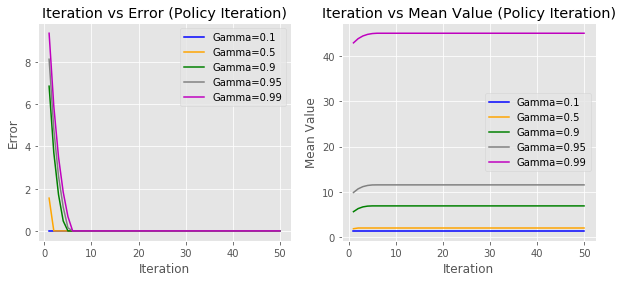

In [104]:
colors = ['b','orange','g', 'gray', 'm']
#max_iter = min(MAX_ITERATION, max(pi_res_iter['Iteration']) + 10)
MAX_ITER_PLOT = 50
fig, ax = plt.subplots(1,2, figsize=(10,4))
for i in range(len(discount_rates)):
    tmp = pi_res_iter[(pi_res_iter.gamma == discount_rates[i])&(pi_res_iter['Iteration']<=MAX_ITER_PLOT)][['Iteration','Error','Mean_V']]
    fill = tmp.iloc[-1,:]
    if tmp.shape[0] < MAX_ITER_PLOT:
        tmp = tmp.append([fill]*(MAX_ITER_PLOT - tmp.shape[0]))
    tmp['Iteration'] = range(1, tmp.shape[0]+1)
    ax[0].plot(tmp['Iteration'], tmp['Error'], color=colors[i], label="Gamma={}".format(round(discount_rates[i],3)))
    ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Gamma={}".format(round(discount_rates[i],3)))
ax[0].set_title('Iteration vs Error (Policy Iteration)')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Error')
ax[0].legend()

ax[1].set_title('Iteration vs Mean Value (Policy Iteration)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mean Value')
ax[1].legend()
plt.savefig("forest_mgt_pi_plot1.png", dpi=100)
plt.show()

## Value Iteration

In [101]:
def run_vi(P, R, discount, max_iter, n_state):
    vi = mdp.ValueIteration(P, R, discount, max_iter=max_iter)
    vi_res = vi.run()

    #print (vi_res)
    iterations, reward, max_reward, mean_reward, error, runtime = [], [], [], [], [], []
    for dict_ in vi_res:
        iterations.append(dict_['Iteration'])
        
        reward.append(dict_['Reward'])
        
        max_reward.append(dict_['Max V'])
        
        mean_reward.append(dict_['Mean V'])
        
        error.append(dict_['Error'])
        
        runtime.append(dict_['Time'])
        

    vi_res_df = pd.DataFrame({'Iteration': iterations, 'Reward': reward, 'Max_V': max_reward,
                              'Mean_V':mean_reward,
                             'Error': error, 'Run Time': runtime})
    vi_value_df = pd.DataFrame({'Num_State': range(1, n_state+1 ), 
                               'Reward': vi.V})

    return vi_res_df, vi_value_df, vi


vi_policies = {}
vi_analysis = {'gamma': discount_rates, 'converge iter':[], 'time':[], 'avg reward':[]}
vi_res_iter = pd.DataFrame()
vi_res_state = pd.DataFrame()
for rate in discount_rates:
    vi_result, vi_val_res, vi = run_vi(P, R, rate, MAX_ITERATION, N_STATES)
    vi_policies[rate] = vi.policy
    vi_analysis['converge iter'].append(vi.iter)
    vi_analysis['avg reward'].append(np.array(vi.V).mean())
    vi_analysis['time'].append(vi.time)
    vi_result['gamma'] = rate
    vi_val_res['gamma'] = rate
    vi_res_iter = vi_res_iter.append(vi_result)
    vi_res_state = vi_res_state.append(vi_val_res)
    

In [102]:
vi_res_iter

,Iteration,Reward,Max_V,Mean_V,Error,Run Time,gamma
0,1,5.000000,5.000000,1.300000,5.000000,0.000088,0.10
1,2,5.350000,5.350000,1.342000,0.350000,0.000263,0.10
0,1,5.000000,5.000000,1.300000,5.000000,0.000082,0.50
1,2,6.750000,6.750000,1.585000,1.750000,0.000181,0.50
2,3,7.415000,7.415000,1.845750,0.612500,0.000283,0.50
...,...,...,...,...,...,...,...
25,26,24.177846,24.177846,13.319635,0.000522,0.001763,0.99
26,27,24.495255,24.495255,13.636920,0.000361,0.001829,0.99
27,28,24.809382,24.809382,13.950952,0.000250,0.001896,0.99
28,29,25.120308,25.120308,14.261819,0.000174,0.001970,0.99


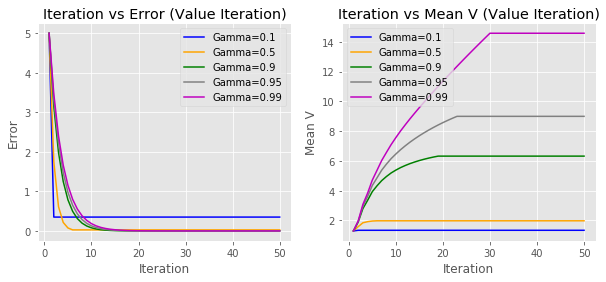

In [103]:
colors = ['b','orange','g', 'gray', 'm']
MAX_ITER_PLOT = 50
fig, ax = plt.subplots(1,2, figsize=(10,4))
for i in range(len(discount_rates)):
    tmp = vi_res_iter[(vi_res_iter.gamma == discount_rates[i])&(vi_res_iter['Iteration']<=MAX_ITER_PLOT)][['Iteration','Error','Mean_V']]
    fill = tmp.iloc[-1,:]
    if tmp.shape[0] < MAX_ITER_PLOT:
        tmp = tmp.append([fill]*(MAX_ITER_PLOT - tmp.shape[0]))
    tmp['Iteration'] = range(1, tmp.shape[0]+1)
    ax[0].plot(tmp['Iteration'], tmp['Error'], color=colors[i], label="Gamma={}".format(round(discount_rates[i],3)))
    ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Gamma={}".format(round(discount_rates[i],3)))
ax[0].set_title('Iteration vs Error (Value Iteration)')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Error')
ax[0].legend()

ax[1].set_title('Iteration vs Mean V (Value Iteration)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mean V')
ax[1].legend()
plt.savefig("forest_mgt_vi_plot1.png", dpi=100)
plt.show()

## Compare PI and VI

Visualize the two optimal policies.

In [109]:
GAMMA = 0.99
print ("PI Policy")
print (pi_policies[GAMMA])
print ("VI Policy")
print (vi_policies[GAMMA])

PI Policy
(0, 1, 1, 1, 0, 0, 0, 0, 0, 0)
VI Policy
(0, 1, 1, 1, 0, 0, 0, 0, 0, 0)



Plot optimal policies

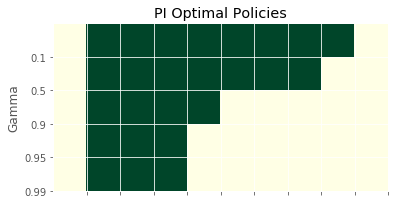

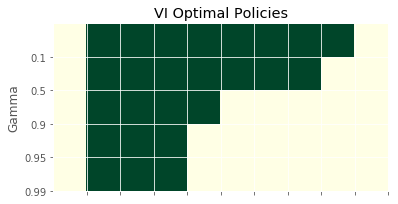

In [164]:
pi_policies_df = {i:[pi_policies[g][i] for g in pi_policies.keys()] for i in range(N_STATES)}
pi_policies_df['Gamma'] = list(pi_policies.keys())
pi_policies_df_new = pd.DataFrame(pi_policies_df).set_index('Gamma')
vi_policies_df = {i:[vi_policies[g][i] for g in vi_policies.keys()] for i in range(N_STATES)}
vi_policies_df['Gamma'] = list(vi_policies.keys())
vi_policies_df_new = pd.DataFrame(vi_policies_df).set_index('Gamma')

import matplotlib.cm as cm
import matplotlib.ticker as ticker
def plot_policy(policy, title, save_fig=False):
    # This plot policy function is created based on the discussion in 
    #https://stackoverflow.com/questions/22158377/colorplot-of-2d-array-with-text-labels

    nx, ny = policy.shape
    indx, indy = np.arange(nx), np.arange(ny)
    x, y = np.meshgrid(indx, indy)

    fig, ax = plt.subplots()
    ax.imshow(policy,  cmap=cm.YlGn) # plot grid values

    
    ax.set_xticks(indy+0.5) 
    ax.set_yticks(indx+0.5)

    ax.set_yticklabels(policy.index)
    ax.set_ylabel('Gamma')

    labels = [item.get_text() for item in ax.get_xticklabels()]
    empty_string_labels = ['']*len(labels)
    ax.set_xticklabels(empty_string_labels)
    #ax.grid(ls='-', lw=2)
    ax.set_title(title)
    if save_fig:
        plt.savefig(title+'.png', dpi=100)
    plt.show()
    
plot_policy(pi_policies_df_new, "PI Optimal Policies", save_fig=True)
plot_policy(vi_policies_df_new, "VI Optimal Policies", save_fig=True)

In [107]:
comparison = pd.merge(pd.DataFrame(pi_analysis), pd.DataFrame(vi_analysis), on='gamma', suffixes=('_pi','_vi'))
comparison

,gamma,converge iter_pi,time_pi,converge iter_vi,time_vi
0,0.10,1,0.000840,2,0.000315
1,0.50,2,0.001165,6,0.000651
2,0.90,5,0.002509,19,0.001297
3,0.95,6,0.002981,23,0.001584
4,0.99,6,0.002952,30,0.002061


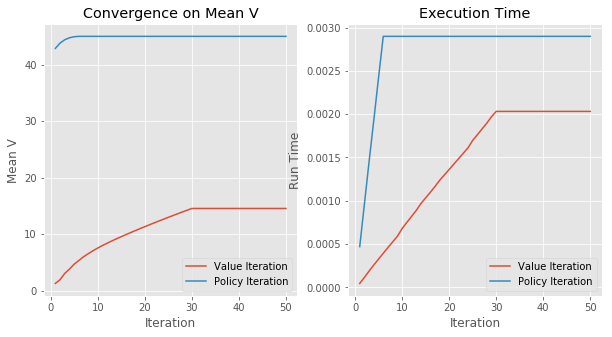

In [165]:
# Plot the convergence and time required for VI/PI
fig, ax = plt.subplots(1,2,figsize=(10,5))
vi_compare = vi_res_iter[vi_res_iter.gamma==GAMMA]
pi_compare = pi_res_iter[pi_res_iter.gamma==GAMMA]
max_iter = 50
if vi_compare['Iteration'].max() < max_iter:
    fill = vi_compare.iloc[-1,:]
    vi_compare = vi_compare.append([fill]*(max_iter - vi_compare.shape[0]))
    vi_compare['Iteration'] = range(1, vi_compare.shape[0]+1)
if pi_compare['Iteration'].max() < max_iter:
    fill = pi_compare.iloc[-1,:]
    pi_compare = pi_compare.append([fill]*(max_iter - pi_compare.shape[0]))
    pi_compare['Iteration'] = range(1, pi_compare.shape[0]+1)

ax[0].plot(vi_compare['Iteration'],vi_compare['Mean_V'], label='Value Iteration')
ax[0].plot(pi_compare['Iteration'],pi_compare['Mean_V'], label='Policy Iteration')
ax[1].plot(vi_compare['Iteration'],vi_compare['Run Time'], label='Value Iteration')
ax[1].plot(pi_compare['Iteration'],pi_compare['Run Time'], label='Policy Iteration')
ax[0].set_title("Convergence on Mean V")
ax[0].set_ylabel("Mean V")
ax[0].set_xlabel("Iteration")
ax[0].legend()
ax[1].set_title("Execution Time")
ax[1].set_ylabel("Run Time")
ax[1].set_xlabel("Iteration")
ax[1].legend()
plt.savefig('forest_mgt_pi_vs_vi.png', dpi=100)
plt.show()



## Q-Learning

In [170]:
import numpy as np
np.random.seed(7)
def run_ql(P, R, discount, alpha, epsilon, alpha_decay, epsilon_decay, max_iter, n_state):
    ql = mdp.QLearning(P, R, discount, alpha=alpha, alpha_decay=alpha_decay, epsilon=epsilon,
                       epsilon_decay=epsilon_decay, n_iter=max_iter, alpha_min=0.1, run_stat_frequency=100)
    ql_res = ql.run()

    iterations, reward, max_reward, mean_reward, error, runtime = [], [], [], [], [], []
    for dict_ in ql_res:
        iterations.append(dict_['Iteration'])
        
        reward.append(dict_['Reward'])
        
        max_reward.append(dict_['Max V'])
        
        mean_reward.append(dict_['Mean V'])
        
        error.append(dict_['Error'])
        
        runtime.append(dict_['Time'])
        

    ql_res_df = pd.DataFrame({'Iteration': iterations, 'Reward': reward, 'Max_V': max_reward,
                              'Mean_V':mean_reward,'Error': error, 'Run Time': runtime})
    ql_value_df = pd.DataFrame({'Num_State': range(1, n_state+1 ), 
                               'Reward': ql.V})


    return ql_res_df, ql_value_df, ql

#ql_result, ql_val_res = run_ql(P, R, 0.9, 20000, num_states)
MAX_ITERATION_QL = 100000
ql_analysis = {'gamma': [], 'alpha':[], 'epsilon':[], 'avg reward':[], 'time':[]}
ql_policies = {}
ql_res_iter = pd.DataFrame()
ql_res_state = pd.DataFrame()

alpha_list = [0.1, 0.3, 0.5, 0.7, 0.9]
epsilon_list = [1, 0.7, 0.5, 0.1]

for alpha in alpha_list:
    for gamma in discount_rates:
        for epsilon in epsilon_list:
            #print (gamma, alpha, epsilon)
            ql_result, ql_val_res, ql = run_ql(P, R, rate, alpha=alpha, epsilon=epsilon, alpha_decay=1.0,  epsilon_decay=0.995,
                                                      max_iter=MAX_ITERATION_QL, n_state=N_STATES)
            ql_policies[(gamma, alpha, epsilon)] = ql.policy
            ql_analysis['gamma'].append(gamma)
            ql_analysis['alpha'].append(alpha)
            ql_analysis['epsilon'].append(epsilon)
            ql_analysis['avg reward'].append(np.array(ql.V).mean())
            ql_analysis['time'].append(ql.time)
            ql_result['gamma'] = gamma
            ql_result['alpha'] = alpha
            ql_result['epsilon'] = epsilon
            ql_val_res['gamma'] = gamma
            ql_val_res['alpha'] = alpha
            ql_val_res['epsilon'] = epsilon
            ql_res_iter = ql_res_iter.append(ql_result)
            ql_res_state = ql_res_state.append(ql_val_res)




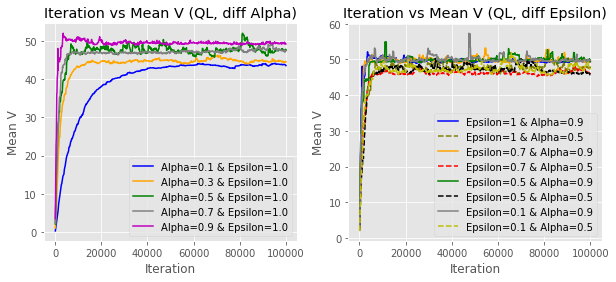

In [174]:
colors = ['b','orange','g', 'gray', 'm']
colors_1 = ['olive','red','black', 'y']

fig, ax = plt.subplots(1,2, figsize=(10,4))
for i in range(len(alpha_list)):
    tmp = ql_res_iter[(ql_res_iter.gamma == GAMMA)&(ql_res_iter.epsilon==1.0)&
                      (ql_res_iter['alpha']==alpha_list[i])][['Iteration','Error','Mean_V']]
    ax[0].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Alpha={} & Epsilon=1.0".format(round(alpha_list[i],3)))
    
for i in range(len(epsilon_list)):
    tmp = ql_res_iter[(ql_res_iter.gamma == GAMMA)&(ql_res_iter.epsilon==epsilon_list[i])&
                      (ql_res_iter['alpha']==0.9)][['Iteration','Error','Mean_V']]
    ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Epsilon={} & Alpha=0.9".format(round(epsilon_list[i],3)))
    tmp = ql_res_iter[(ql_res_iter.gamma == GAMMA)&(ql_res_iter.epsilon==epsilon_list[i])&
                      (ql_res_iter['alpha']==0.5)][['Iteration','Error','Mean_V']]
    ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors_1[i], linestyle='--', label="Epsilon={} & Alpha=0.5".format(round(epsilon_list[i],3)))
 
ax[0].set_title('Iteration vs Mean V (QL, diff Alpha)')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Mean V')
ax[0].legend()

ax[1].set_title('Iteration vs Mean V (QL, diff Epsilon)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mean V')
ax[1].legend()
plt.savefig("forest_mgt_ql_vi_plot1.png", dpi=100)
plt.show()

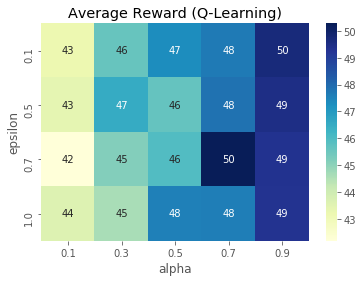

In [213]:
QL_eval_res_df = pd.DataFrame(ql_analysis)
GAMMA = 0.99
QL_comp = pd.pivot_table(QL_eval_res_df[QL_eval_res_df.gamma==GAMMA], values='avg reward', columns='alpha', index='epsilon')
fig, ax = plt.subplots()
ax = sns.heatmap(QL_comp, annot=True,  cmap="YlGnBu")
ax.set_title("Average Reward (Q-Learning)")
plt.savefig("forest_mgt_ql_heatmap1.png")


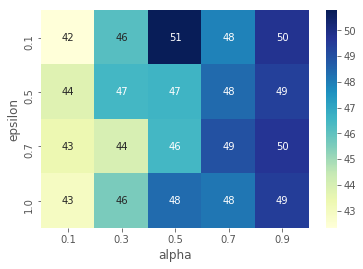

In [87]:
GAMMA = 0.95
QL_comp = pd.pivot_table(QL_eval_res_df[QL_eval_res_df.gamma==GAMMA], values='avg reward', columns='alpha', index='epsilon')
fig, ax = plt.subplots()
ax = sns.heatmap(QL_comp, annot=True,  cmap="YlGnBu")

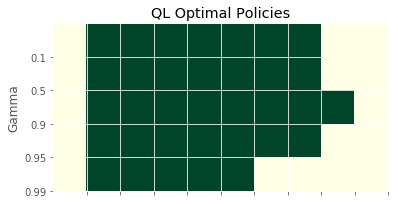

In [179]:
ql_policies_df = {i:[ql_policies[(g,0.7,0.7)][i] for g in discount_rates] for i in range(N_STATES)}
ql_policies_df['Gamma'] = discount_rates
ql_policies_df_new = pd.DataFrame(ql_policies_df).set_index('Gamma')


plot_policy(ql_policies_df_new, "QL Optimal Policies", save_fig=True)

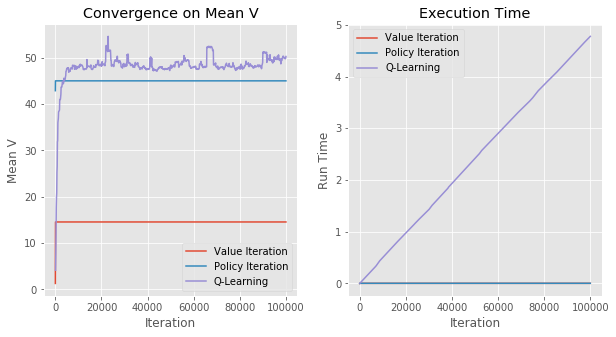

In [265]:
best_alpha = 0.7
best_epsilon=0.7
pd.DataFrame(ql_analysis)# Plot the convergence and time required for VI, PI and Q-Learning
fig, ax = plt.subplots(1,2,figsize=(10,5))
vi_compare = vi_res_iter[vi_res_iter.gamma==GAMMA]
pi_compare = pi_res_iter[pi_res_iter.gamma==GAMMA]
ql_compare = ql_res_iter[(ql_res_iter.gamma==GAMMA)&(ql_res_iter.alpha==best_alpha)&(ql_res_iter.epsilon==best_epsilon)]
max_iter = max(vi_compare['Iteration'].max(), pi_compare['Iteration'].max(),  ql_compare['Iteration'].max())
if vi_compare['Iteration'].max() < max_iter:
    fill = vi_compare.iloc[-1,:]
    vi_compare = vi_compare.append([fill]*(max_iter - vi_compare.shape[0]))
    vi_compare['Iteration'] = range(1, vi_compare.shape[0]+1)
if pi_compare['Iteration'].max() < max_iter:
    fill = pi_compare.iloc[-1,:]
    pi_compare = pi_compare.append([fill]*(max_iter - pi_compare.shape[0]))
    pi_compare['Iteration'] = range(1, pi_compare.shape[0]+1)

ax[0].plot(vi_compare['Iteration'],vi_compare['Mean_V'], label='Value Iteration')
ax[0].plot(pi_compare['Iteration'],pi_compare['Mean_V'], label='Policy Iteration')
ax[0].plot(ql_compare['Iteration'],ql_compare['Mean_V'], label='Q-Learning')
ax[1].plot(vi_compare['Iteration'],vi_compare['Run Time'], label='Value Iteration')
ax[1].plot(pi_compare['Iteration'],pi_compare['Run Time'], label='Policy Iteration')
ax[1].plot(ql_compare['Iteration'],ql_compare['Run Time'], label='Q-Learning')
ax[0].set_title("Convergence on Mean V")
ax[0].set_ylabel("Mean V")
ax[0].set_xlabel("Iteration")
ax[0].legend()
ax[1].set_title("Execution Time")
ax[1].set_ylabel("Run Time")
ax[1].set_xlabel("Iteration")
ax[1].legend()
plt.savefig('forest_mgt_ql_comparison.png', dpi=100)
plt.show()

# Large Size Problem

In [210]:
N_STATES_LARGE = 2000
P_large, R_large = example.forest(S=N_STATES_LARGE, r1=100000, r2=2, p=0.05)

## Policy Iteration

In [214]:
discount_rates = [0.1, 0.5, 0.9, 0.95, 0.99]
MAX_ITERATION = 1000
pi_policies_large = {}
pi_analysis_large = {'gamma': discount_rates, 'converge iter':[], 'time':[], 'avg reward':[]}
pi_res_iter_large = pd.DataFrame()
pi_res_state_large = pd.DataFrame()
for rate in discount_rates:
    pi_result, pi_val_res, pi = run_pi(P_large, R_large, rate, MAX_ITERATION, N_STATES_LARGE)
    pi_policies_large[rate] = pi.policy
    pi_analysis_large['avg reward'].append(np.array(pi.V).mean())
    pi_analysis_large['converge iter'].append(pi.iter)
    pi_analysis_large['time'].append(pi.time)
    pi_result['gamma'] = rate
    pi_val_res['gamma'] = rate
    pi_res_iter_large = pi_res_iter_large.append(pi_result)
    pi_res_state_large = pi_res_state_large.append(pi_val_res)

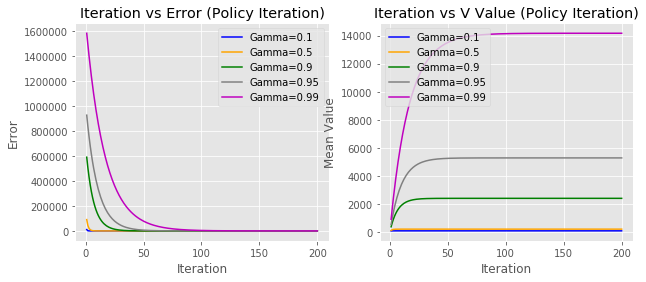

In [215]:
colors = ['b','orange','g', 'gray', 'm']
#max_iter = min(MAX_ITERATION, max(pi_res_iter['Iteration']) + 10)
MAX_ITER_PLOT = 200
fig, ax = plt.subplots(1,2, figsize=(10,4))
for i in range(len(discount_rates)):
    tmp = pi_res_iter_large[(pi_res_iter_large.gamma == discount_rates[i])&(pi_res_iter_large['Iteration']<=MAX_ITER_PLOT)][['Iteration','Error','Mean_V']]
    fill = tmp.iloc[-1,:]
    if tmp.shape[0] < MAX_ITER_PLOT:
        tmp = tmp.append([fill]*(MAX_ITER_PLOT - tmp.shape[0]))
    tmp['Iteration'] = range(1, tmp.shape[0]+1)
    ax[0].plot(tmp['Iteration'], tmp['Error'], color=colors[i], label="Gamma={}".format(round(discount_rates[i],3)))
    ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Gamma={}".format(round(discount_rates[i],3)))
ax[0].set_title('Iteration vs Error (Policy Iteration)')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Error')
ax[0].legend()

ax[1].set_title('Iteration vs V Value (Policy Iteration)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mean Value')
ax[1].legend()
plt.savefig("forest_mgt_large_pi_plot.png", dpi=100)
plt.show()

In [216]:
pi_res_iter_large

,Iteration,Reward,Max_V,Mean_V,Error,Run Time,gamma
0,1,1.104972e+05,1.104972e+05,56.257297,1.049623e+04,2.032371,0.10
1,2,1.104972e+05,1.104972e+05,61.505412,9.962285e+02,3.973625,0.10
2,3,1.104972e+05,1.104972e+05,62.003526,9.372846e+01,5.849714,0.10
3,4,1.104972e+05,1.104972e+05,62.050390,7.990962e+00,7.809391,0.10
4,5,1.104972e+05,1.104972e+05,62.054386,1.421085e-14,9.641360,0.10
...,...,...,...,...,...,...,...
194,195,1.680713e+06,1.680713e+06,14171.343754,2.065250e+00,352.021296,0.99
195,196,1.680713e+06,1.680713e+06,14171.344787,1.427037e+00,353.571600,0.99
196,197,1.680713e+06,1.680713e+06,14171.345500,8.267969e-01,355.149655,0.99
197,198,1.680713e+06,1.680713e+06,14171.345913,2.622714e-01,356.662518,0.99


## Value Interation

In [292]:
vi_policies_large = {}
vi_analysis_large = {'gamma': discount_rates, 'converge iter':[], 'time':[], 'avg reward':[]}
vi_res_iter_large = pd.DataFrame()
vi_res_state_large = pd.DataFrame()
for rate in discount_rates:
    vi_result, vi_val_res, vi = run_vi(P_large, R_large, rate, MAX_ITERATION, N_STATES_LARGE)
    vi_policies_large[rate] = vi.policy
    vi_analysis_large['avg reward'].append(np.array(vi.V).mean())
    vi_analysis_large['converge iter'].append(vi.iter)
    vi_analysis_large['time'].append(vi.time)
    vi_result['gamma'] = rate
    vi_val_res['gamma'] = rate
    vi_res_iter_large = vi_res_iter_large.append(vi_result)
    vi_res_state_large = vi_res_state_large.append(vi_val_res)
    

In [293]:
vi_res_iter_large

,Iteration,Reward,Max_V,Mean_V,Error,Run Time,gamma
0,1,1.000000e+05,1.000000e+05,50.999000,100000.000000,0.016002,0.10
1,2,1.095000e+05,1.095000e+05,60.498548,9500.000000,0.016911,0.10
2,3,1.104025e+05,1.104025e+05,61.861279,902.500000,0.017776,0.10
3,4,1.104882e+05,1.104882e+05,62.032298,85.737500,0.018641,0.10
4,5,1.104964e+05,1.104964e+05,62.052246,8.145063,0.019468,0.10
...,...,...,...,...,...,...,...
333,334,1.680711e+06,1.680711e+06,14169.648199,0.000134,0.381133,0.99
334,335,1.680711e+06,1.680711e+06,14169.665188,0.000126,0.381892,0.99
335,336,1.680711e+06,1.680711e+06,14169.682007,0.000119,0.391234,0.99
336,337,1.680711e+06,1.680711e+06,14169.698656,0.000112,0.392062,0.99


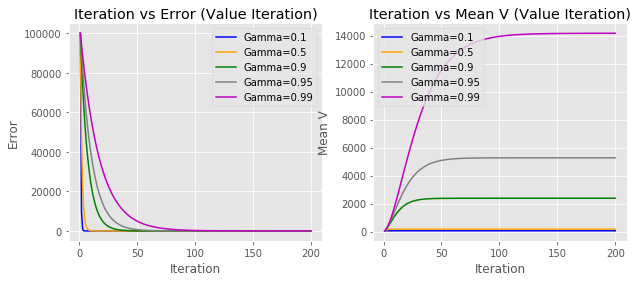

In [227]:
colors = ['b','orange','g', 'gray', 'm']
MAX_ITER_PLOT = 200
fig, ax = plt.subplots(1,2, figsize=(10,4))
for i in range(len(discount_rates)):
    tmp = vi_res_iter_large[(vi_res_iter_large.gamma == discount_rates[i])&(vi_res_iter_large['Iteration']<=MAX_ITER_PLOT)][['Iteration','Error','Mean_V']]
    fill = tmp.iloc[-1,:]
    if tmp.shape[0] < MAX_ITER_PLOT:
        tmp = tmp.append([fill]*(MAX_ITER_PLOT - tmp.shape[0]))
    tmp['Iteration'] = range(1, tmp.shape[0]+1)
    ax[0].plot(tmp['Iteration'], tmp['Error'], color=colors[i], label="Gamma={}".format(round(discount_rates[i],3)))
    ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Gamma={}".format(round(discount_rates[i],3)))
ax[0].set_title('Iteration vs Error (Value Iteration)')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Error')
ax[0].legend()

ax[1].set_title('Iteration vs Mean V (Value Iteration)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mean V')
ax[1].legend()
plt.savefig("forest_mgt_large_vi_plot1.png", dpi=100)
plt.show()

## Compare VI and PI

In [222]:
GAMMA = 0.99
print ("PI Policy")
#print (pi_policies_large[GAMMA])
print ("VI Policy")
#print (vi_policies_large[GAMMA])

PI Policy
VI Policy


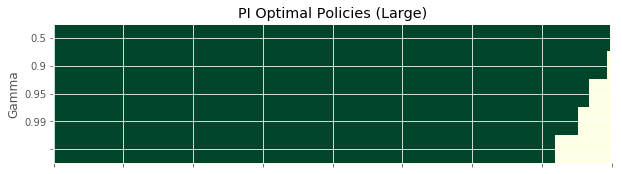

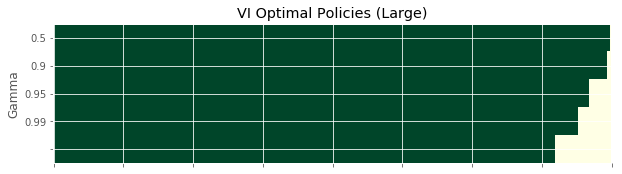

In [267]:
pi_policies_df_large = {i:[pi_policies_large[g][i] for g in pi_policies_large.keys()] for i in range(N_STATES_LARGE)}
pi_policies_df_large['Gamma'] = list(pi_policies_large.keys())
pi_policies_df_large_new = pd.DataFrame(pi_policies_df_large).set_index('Gamma')
vi_policies_df_large = {i:[vi_policies_large[g][i] for g in vi_policies_large.keys()] for i in range(N_STATES_LARGE)}
vi_policies_df_large['Gamma'] = list(vi_policies_large.keys())
vi_policies_df_large_new = pd.DataFrame(vi_policies_df_large).set_index('Gamma')

import matplotlib.cm as cm
import matplotlib.ticker as ticker
def plot_policy(policy, title, save_fig=False):
    # This plot policy function is created based on the discussion in 
    #https://stackoverflow.com/questions/22158377/colorplot-of-2d-array-with-text-labels

    nx, ny = policy.shape
    indx, indy = np.arange(nx), np.arange(ny)
    x, y = np.meshgrid(indx, indy)

    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(policy,  cmap=cm.YlGn, aspect=100) # plot grid values

    
    #ax.set_xticks(indy+0.5) 
    #ax.set_yticks(indx+0.5)

    ax.set_yticklabels(policy.index)
    ax.set_ylabel('Gamma')

    labels = [item.get_text() for item in ax.get_xticklabels()]
    empty_string_labels = ['']*len(labels)
    ax.set_xticklabels(empty_string_labels)
    #ax.grid(ls='-', lw=2)
    ax.set_title(title)
    if save_fig:
        plt.savefig(title+'.png', dpi=100)
    plt.show()
    
plot_policy(pi_policies_df_large_new, "PI Optimal Policies (Large)", save_fig=True)
plot_policy(vi_policies_df_large_new, "VI Optimal Policies (Large)", save_fig=True)

In [228]:
comparison = pd.merge(pd.DataFrame(pi_analysis_large), pd.DataFrame(vi_analysis_large), on='gamma', suffixes=('_pi','_vi'))
comparison

,gamma,converge iter_pi,time_pi,converge iter_vi,time_vi
0,0.10,5,9.641752,6,0.005273
1,0.50,16,30.512701,22,0.021286
2,0.90,78,141.534031,117,0.103194
3,0.95,119,222.643155,186,0.163871
4,0.99,199,358.305633,338,0.271947


In [ ]:
# Plot the convergence and time required for VI/PI
fig, ax = plt.subplots(1,2,figsize=(10,5))
vi_compare_large = vi_res_iter_large[vi_res_iter_large.gamma==GAMMA]
pi_compare_large = pi_res_iter_large[pi_res_iter_large.gamma==GAMMA]
max_iter = max(vi_compare_large['Iteration'].max(), pi_compare_large['Iteration'].max())
if vi_compare_large['Iteration'].max() < max_iter:
    fill = large_vi_compare.iloc[-1,:]
    vi_compare_large = vi_compare_large.append([fill]*(max_iter - vi_compare_large.shape[0]))
    vi_compare_large['Iteration'] = range(1, vi_compare_large.shape[0]+1)
if pi_compare_large['Iteration'].max() < max_iter:
    fill = pi_compare_large.iloc[-1,:]
    pi_compare_large = pi_compare_large.append([fill]*(max_iter - pi_compare_large.shape[0]))
    pi_compare_large['Iteration'] = range(1, pi_compare_large.shape[0]+1)

ax[0].plot(vi_compare_large['Iteration'],vi_compare_large['Mean_V'], label='Value Iteration')
ax[0].plot(pi_compare_large['Iteration'],pi_compare_large['Mean_V'], label='Policy Iteration')
ax[1].plot(vi_compare_large['Iteration'],vi_compare_large['Run Time'], label='Value Iteration')
ax[1].plot(pi_compare_large['Iteration'],pi_compare_large['Run Time'], label='Policy Iteration')
ax[0].set_title("Convergence on Mean V")
ax[0].set_ylabel("Mean V")
ax[0].set_xlabel("Iteration")
ax[0].legend()
ax[1].set_title("Execution Time")
ax[1].set_ylabel("Run Time")
ax[1].set_xlabel("Iteration")
ax[1].legend()
plt.savefig('Forest_large_pi_vs_vi.png', dpi=100)
plt.show()

## Q-Learning

In [242]:
#ql_result, ql_val_res = run_ql(P, R, 0.9, 20000, num_states)
MAX_ITERATION_QL = 5000000
ql_analysis_large = {'gamma': [], 'alpha':[], 'epsilon':[], 'avg reward':[], 'time':[]}
ql_policies_large = {}
ql_res_iter_large = pd.DataFrame()
ql_res_state_large = pd.DataFrame()

alpha_list = [0.1, 0.3, 0.7, 0.9]

epsilon_list = [1, 0.7, 0.5, 0.1]

for alpha in alpha_list:
    for gamma in discount_rates[4:]:
        for epsilon in epsilon_list:
            print (gamma, alpha, epsilon)
            ql_result, ql_val_res, ql = run_ql(P_large, R_large, rate, alpha=alpha, epsilon=epsilon, alpha_decay=1.0, epsilon_decay=0.995,
                                                      max_iter=MAX_ITERATION_QL, n_state=N_STATES_LARGE)
            ql_policies_large[(gamma, alpha, epsilon)] = ql.policy
            ql_analysis_large['gamma'].append(gamma)
            ql_analysis_large['alpha'].append(alpha)
            ql_analysis_large['epsilon'].append(epsilon)
            ql_analysis_large['avg reward'].append(np.array(ql.V).mean())
            ql_analysis_large['time'].append(ql.time)
            ql_result['gamma'] = gamma
            ql_result['alpha'] = alpha
            ql_result['epsilon'] = epsilon
            ql_val_res['gamma'] = gamma
            ql_val_res['alpha'] = alpha
            ql_val_res['epsilon'] = epsilon
            ql_res_iter_large = ql_res_iter_large.append(ql_result)
            ql_res_state_large = ql_res_state_large.append(ql_val_res)



0.99 0.7 1
0.99 0.7 0.7
0.99 0.7 0.5
0.99 0.7 0.1
0.99 0.9 1
0.99 0.9 0.7
0.99 0.9 0.5
0.99 0.9 0.1


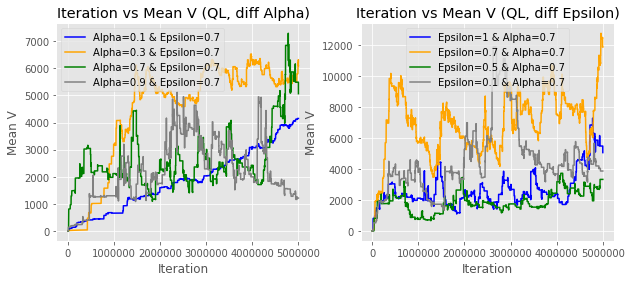

In [256]:

GAMMA = 0.99
colors = ['b','orange','g', 'gray', 'm']
colors_1 = ['olive','red','black', 'y']

fig, ax = plt.subplots(1,2, figsize=(10,4))
alpha_list = [0.1, 0.3, 0.7, 0.9]
for i in range(len(alpha_list)):
    tmp = ql_res_iter_large[(ql_res_iter_large.gamma == GAMMA)&(ql_res_iter_large.epsilon==1.0)&
                      (ql_res_iter_large['alpha']==alpha_list[i])][['Iteration','Error','Mean_V']]
    ax[0].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Alpha={} & Epsilon=0.7".format(round(alpha_list[i],3)))
    
for i in range(len(epsilon_list)):
    tmp = ql_res_iter_large[(ql_res_iter_large.gamma == GAMMA)&(ql_res_iter_large.epsilon==epsilon_list[i])&
                      (ql_res_iter_large['alpha']==0.7)][['Iteration','Error','Mean_V']]
    ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Epsilon={} & Alpha=0.7".format(round(epsilon_list[i],3)))
    #tmp = ql_res_iter[(ql_res_iter.gamma == GAMMA)&(ql_res_iter.epsilon==epsilon_list[i])&
    #                  (ql_res_iter['alpha']==0.5)][['Iteration','Error','Mean_V']]
    #ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors_1[i], linestyle='--', label="Epsilon={} & Alpha=0.5".format(round(epsilon_list[i],3)))

    
ax[0].set_title('Iteration vs Mean V (QL, diff Alpha)')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Mean V')
ax[0].legend()

ax[1].set_title('Iteration vs Mean V (QL, diff Epsilon)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mean V')
ax[1].legend()
plt.savefig("forest_mgt_large_ql_plot1.png", dpi=100)
plt.show()

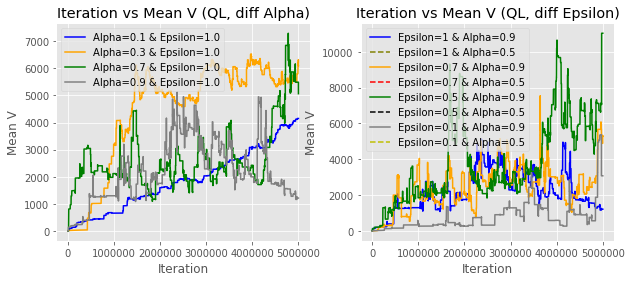

In [257]:
colors = ['b','orange','g', 'gray', 'm']
colors_1 = ['olive','red','black', 'y']

fig, ax = plt.subplots(1,2, figsize=(10,4))
alpha_list = [0.1, 0.3, 0.7, 0.9]
for i in range(len(alpha_list)):
    tmp = ql_res_iter_large[(ql_res_iter_large.gamma == GAMMA)&(ql_res_iter_large.epsilon==1.0)&
                      (ql_res_iter_large['alpha']==alpha_list[i])][['Iteration','Error','Mean_V']]
    ax[0].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Alpha={} & Epsilon=1.0".format(round(alpha_list[i],3)))
    
for i in range(len(epsilon_list)):
    tmp = ql_res_iter_large[(ql_res_iter_large.gamma == GAMMA)&(ql_res_iter_large.epsilon==epsilon_list[i])&
                      (ql_res_iter_large['alpha']==0.9)][['Iteration','Error','Mean_V']]
    ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors[i], label="Epsilon={} & Alpha=0.9".format(round(epsilon_list[i],3)))
    tmp = ql_res_iter_large[(ql_res_iter_large.gamma == GAMMA)&(ql_res_iter_large.epsilon==epsilon_list[i])&
                      (ql_res_iter_large['alpha']==0.5)][['Iteration','Error','Mean_V']]
    ax[1].plot(tmp['Iteration'], tmp['Mean_V'],color=colors_1[i], linestyle='--', label="Epsilon={} & Alpha=0.5".format(round(epsilon_list[i],3)))
 
ax[0].set_title('Iteration vs Mean V (QL, diff Alpha)')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Mean V')
ax[0].legend()

ax[1].set_title('Iteration vs Mean V (QL, diff Epsilon)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mean V')
ax[1].legend()
plt.savefig("forest_mgt_large_ql_plot1.png", dpi=100)
plt.show()

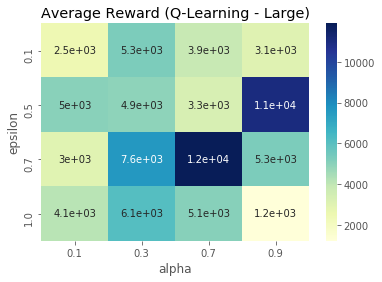

In [289]:
QL_eval_res_df_large = pd.DataFrame(ql_analysis_large)
GAMMA = 0.99
QL_comp_large = pd.pivot_table(QL_eval_res_df_large[QL_eval_res_df_large.gamma==GAMMA], values='avg reward', columns='alpha', index='epsilon')
fig, ax = plt.subplots()
ax = sns.heatmap(QL_comp_large, annot=True,  cmap="YlGnBu")
ax.set_title("Average Reward (Q-Learning - Large)")
plt.savefig("forest_mgt_large_ql_heatmap1.png")

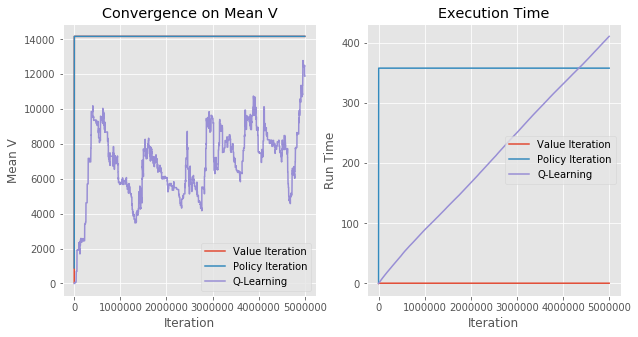

In [299]:
best_alpha = 0.7
best_epsilon=0.7
pd.DataFrame(ql_analysis)# Plot the convergence and time required for VI, PI and Q-Learning
fig, ax = plt.subplots(1,2,figsize=(10,5))
vi_compare_large = vi_res_iter_large[vi_res_iter_large.gamma==GAMMA]
pi_compare_large = pi_res_iter_large[pi_res_iter_large.gamma==GAMMA]
ql_compare_large = ql_res_iter_large[(ql_res_iter_large.gamma==GAMMA)&(ql_res_iter_large.alpha==best_alpha)&(ql_res_iter_large.epsilon==best_epsilon)]
max_iter = max(vi_compare_large['Iteration'].max(), pi_compare_large['Iteration'].max(),  ql_compare_large['Iteration'].max())
if vi_compare_large['Iteration'].max() < max_iter:
    fill = vi_compare_large.iloc[-1,:]
    vi_compare_large = vi_compare_large.append([fill]*(max_iter - vi_compare_large.shape[0]))
    vi_compare_large['Iteration'] = range(1, vi_compare_large.shape[0]+1)
if pi_compare_large['Iteration'].max() < max_iter:
    fill = pi_compare_large.iloc[-1,:]
    pi_compare_large = pi_compare_large.append([fill]*(max_iter - pi_compare_large.shape[0]))
    pi_compare_large['Iteration'] = range(1, pi_compare_large.shape[0]+1)

ax[0].plot(vi_compare_large['Iteration'],vi_compare_large['Mean_V'], label='Value Iteration')
ax[0].plot(pi_compare_large['Iteration'],pi_compare_large['Mean_V'], label='Policy Iteration')
ax[0].plot(ql_compare_large['Iteration'],ql_compare_large['Mean_V'], label='Q-Learning')
ax[1].plot(vi_compare_large['Iteration'],vi_compare_large['Run Time'], label='Value Iteration')
ax[1].plot(pi_compare_large['Iteration'],pi_compare_large['Run Time'], label='Policy Iteration')
ax[1].plot(ql_compare_large['Iteration'],ql_compare_large['Run Time'], label='Q-Learning')
ax[0].set_title("Convergence on Mean V")
ax[0].set_ylabel("Mean V")
ax[0].set_xlabel("Iteration")
ax[0].legend()
ax[1].set_title("Execution Time")
ax[1].set_ylabel("Run Time")
ax[1].set_xlabel("Iteration")
ax[1].legend()
plt.savefig('forest_mgt_large_ql_comparison.png', dpi=100)
plt.show()

# End